In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

airports = pd.read_csv("datasets/GEO_Basemap/airports.csv")
airlines = pd.read_csv("datasets/GEO_Basemap/airlines.csv")
routes = pd.read_csv("datasets/GEO_Basemap/routes.csv")
geo_routes = pd.read_csv("datasets/GEO_Basemap/geo_routes.csv")

In [20]:
fig, ax = plt.subplots(figsize = (20,15))

# Create Basemap instance
m = Basemap(projection = 'merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)

# Basemap.scatter method takes list as an argument
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

# Map longitudes and latitudes to Cartesian
x, y = m(longitudes, latitudes)

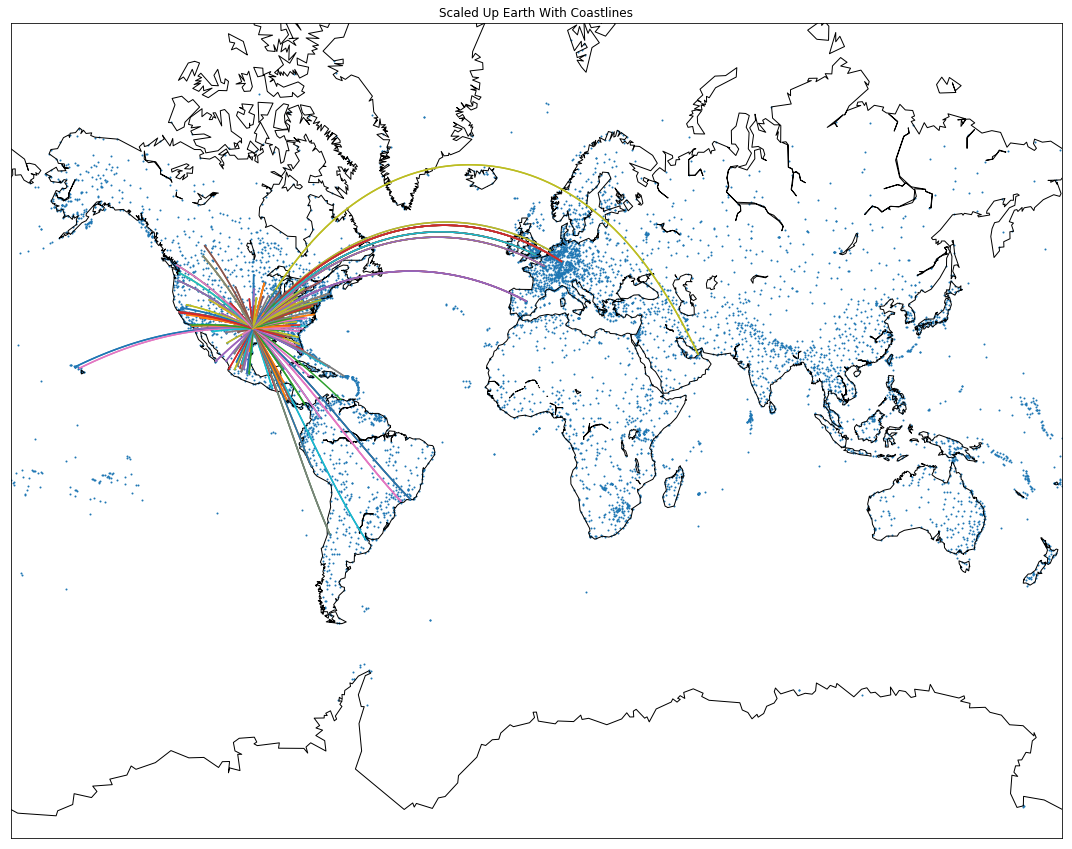

In [21]:
# Since Basemap is built upon Matplotlib, we can use all the 
# plotting methods of Matplotlib
m.scatter(x, y, s=1) # s is size of points on the map

# Draw coaslines for continents
m.drawcoastlines()

# Method to draw great circle between 2 points 
# Draw Great Circles
def create_great_circles(df):
    for index, row in df.iterrows():
        # Basemap.drawgreatcircle() method cannot draw great circle 
        # if absolute difference between starting and ending lat or 
        # log is more than 180. Since it goes out of the boundary 
        # of the map. 
        lat_diff = abs(row["end_lat"] - row["start_lat"])
        lon_diff = abs(row["end_lon"] - row["start_lon"])
        
        if lat_diff < 180 and lon_diff < 180:
            m.drawgreatcircle(row["start_lon"], row["start_lat"], row["end_lon"], row["end_lat"])

# Draw great circle for origin airport "DFW"
is_dfw = geo_routes["source"] == "DFW"
dfw = geo_routes.loc[is_dfw]


create_great_circles(dfw)

plt.title("Scaled Up Earth With Coastlines")
plt.show()